# DATS-6103 Project 3 - Analysis of Suicide Rate

Suicide has been a constant socioeconomical problem in the world. In the united States itself, it is ranked 10th leading cause of death. This project will analysize the suicide count from different countries with different factors such as sex, age, year, etc. 

# 1. Pre-Analysis and Data Cleaning

In [33]:
# Loading required libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")
colors = ["amber", "windows blue", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))
sns.set_context("notebook", 1.5)
alpha = 0.7

In [34]:
# reading the csv file and looking at the first 10 rows

df0 = pd.read_csv("master.csv")
df0.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [35]:
# Show data last 10 rows
df0.tail(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27810,Uzbekistan,2014,female,15-24 years,347,2992817,11.59,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27811,Uzbekistan,2014,male,55-74 years,144,1271111,11.33,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers
27812,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27813,Uzbekistan,2014,male,75+ years,17,224995,7.56,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27814,Uzbekistan,2014,female,25-34 years,162,2735238,5.92,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [36]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [37]:
# Number unique countries

df0['country'].nunique()

101

In [38]:
# Change columns names
 
df0.rename(columns={'suicides_no':'suicides', 'suicides/100k pop':'suicides/100k',\
                   ' gdp_for_year ($) ':'gdp/year ', 'gdp_per_capita ($)':'gdp/capita'}, inplace=True)
df0.head(10)

,country,year,sex,age,suicides,population,suicides/100k,country-year,HDI for year,gdp/year,gdp/capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


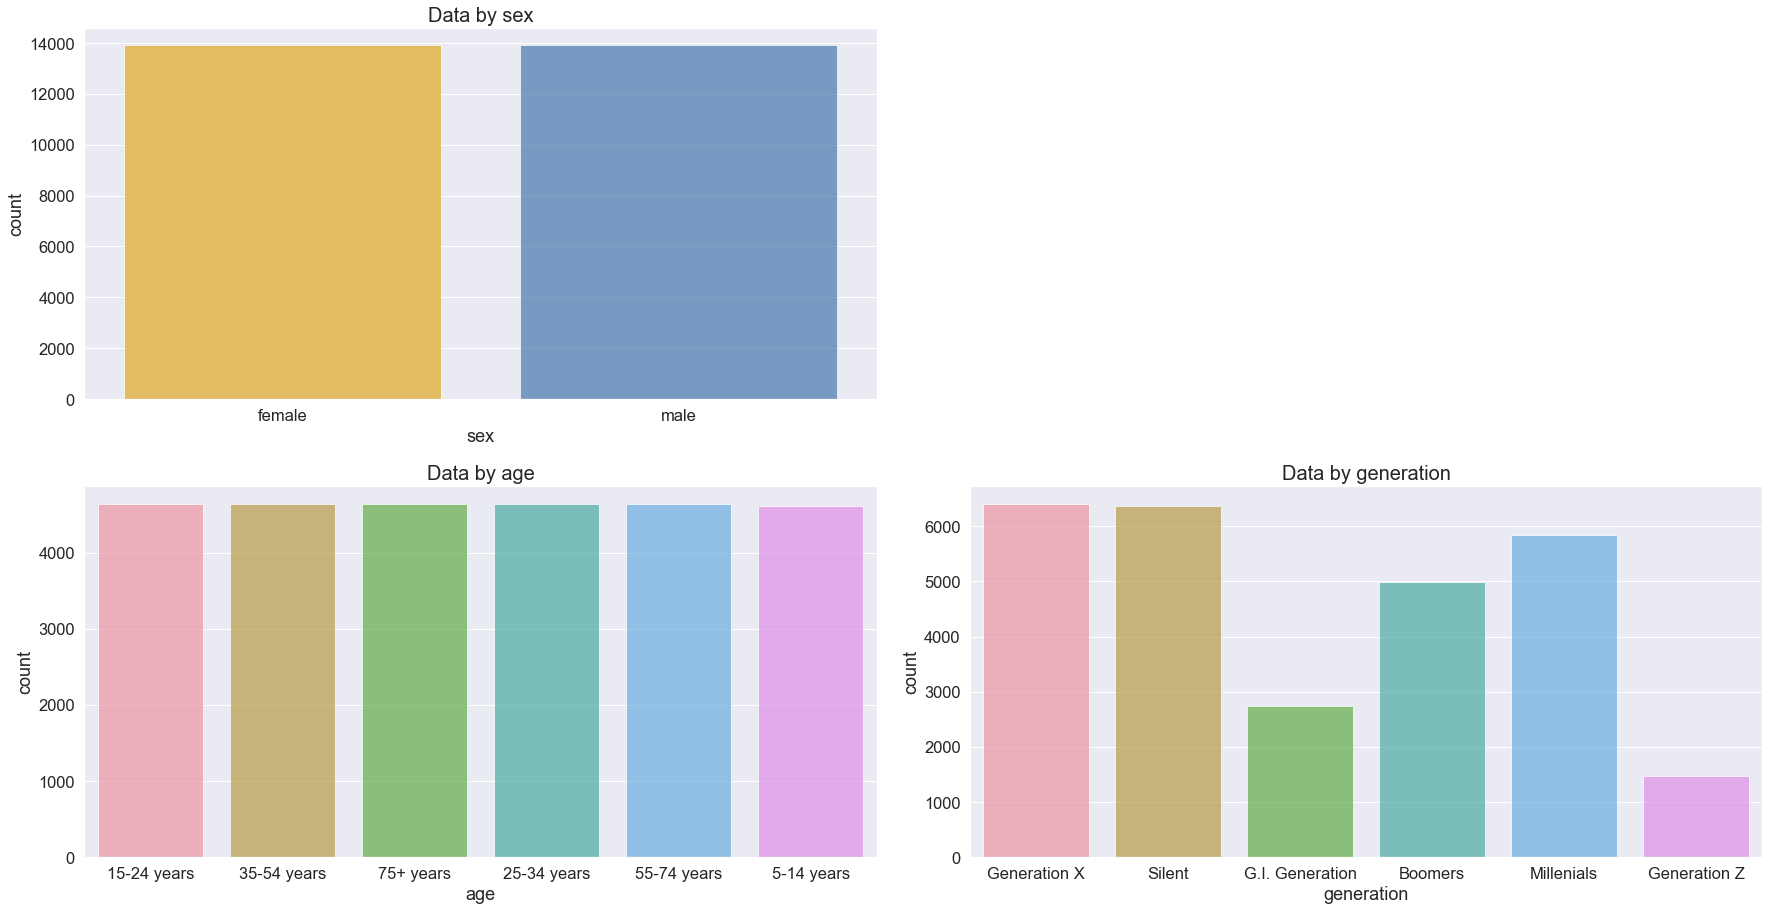

In [39]:
# Data by Sex, Age, and Generation

plt.figure(figsize=(25,13))
# By sex
plt.subplot(221)
sns.countplot(x='sex', data=df0, alpha=alpha, order=['female','male'])
plt.title('Data by sex', fontsize=20)
# By age
plt.subplot(223)
sns.countplot(x='age', data=df0, alpha=alpha)
plt.title('Data by age', fontsize=20)
# By generation
plt.subplot(224)
sns.countplot(x='generation', data=df0, alpha=alpha)
plt.title('Data by generation', fontsize=20)

plt.tight_layout()
plt.show()

This shows that the amount of data by sex and age is same. Generation data have different amount of data.

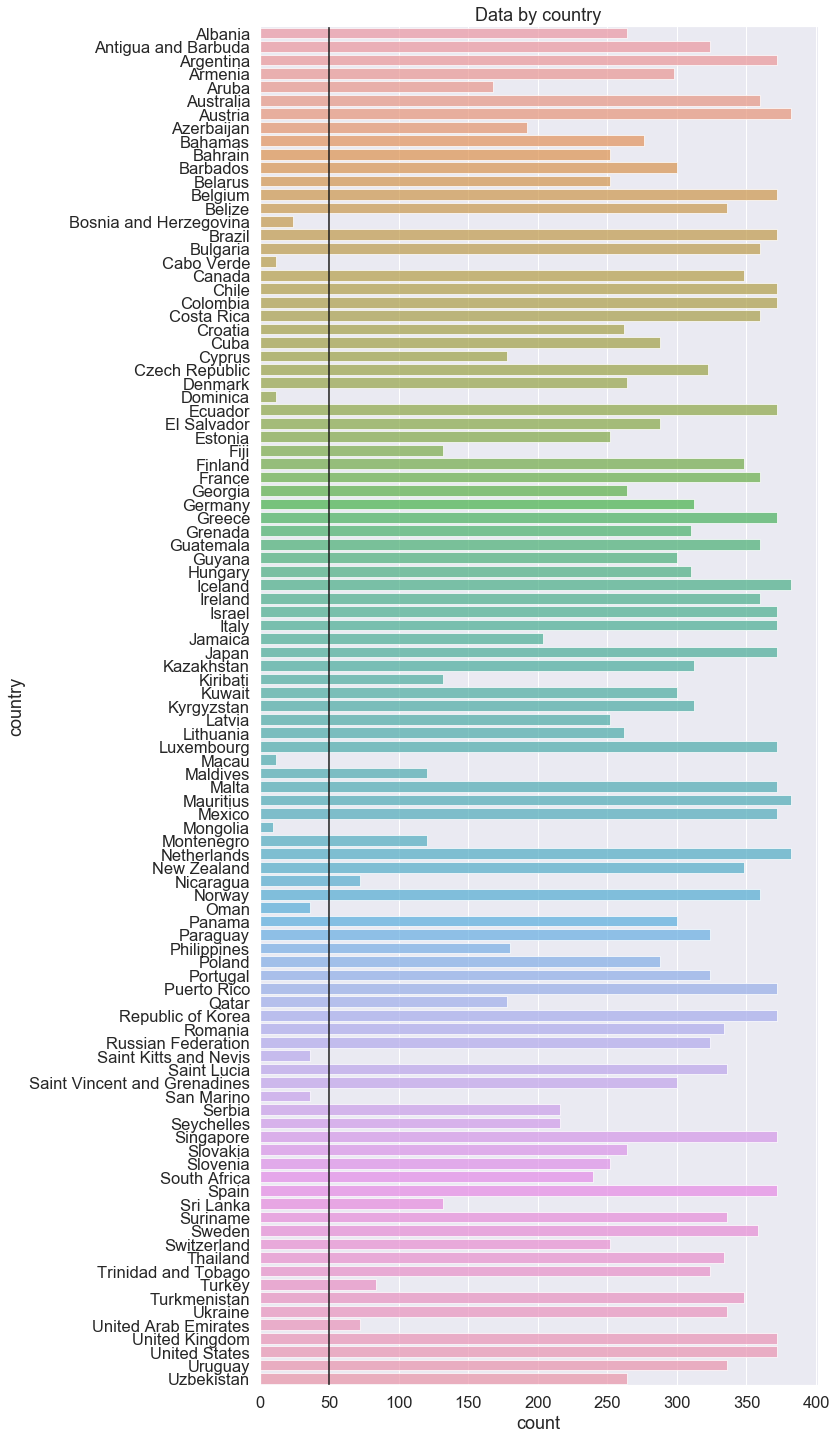

In [40]:
# Data by country

plt.figure(figsize=(10,25))
sns.countplot(y='country', data=df0, alpha=alpha)
plt.title('Data by country')
plt.axvline(x=50, color='k')
plt.show()

This chart shows the total number of data per country. The black line is drawn at 50 data count as a threshold for this analysis. Countries with less than 50 data count will de deleted.

In [41]:
country_amountData = df0.groupby('country').count()['year'].reset_index()
country_amountData.sort_values(by='year', ascending=True). head(10)

,country,year
59,Mongolia,10
27,Dominica,12
54,Macau,12
17,Cabo Verde,12
14,Bosnia and Herzegovina,24
65,Oman,36
76,Saint Kitts and Nevis,36
79,San Marino,36
96,United Arab Emirates,72
63,Nicaragua,72


In [42]:
country_selectList = country_amountData[country_amountData['year'] > 50]['country'].reset_index()

In [43]:
df1 = pd.merge(df0, country_selectList, how='outer', indicator=True)
df1 = df1[df1['_merge']=='both']
df1.nunique()

country             93
year                32
sex                  2
age                  6
suicides          2084
population       25440
suicides/100k     5294
country-year      2306
HDI for year       305
gdp/year          2306
gdp/capita        2219
generation           6
index               93
_merge               1
dtype: int64

Therefore, we have 93 countries from the original 101 to be considered in our analysis. Now we move to the amount of data per year, which is plotted in the following figure. Again, we will delete the year which its data is below the black line. In this case only 2016.

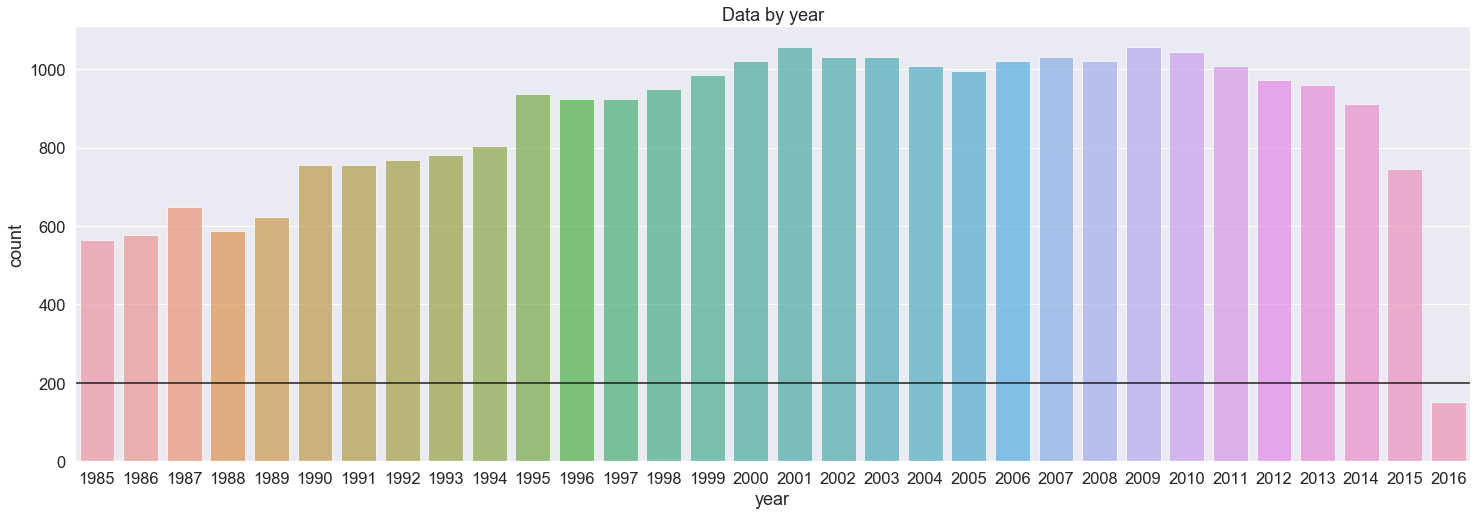

In [44]:
# Data by Year
plt.figure(figsize=(25,8))
sns.countplot(x='year', data=df1, alpha=alpha)
plt.title('Data by year')
plt.axhline(y=200, color='k')
plt.show()

In [45]:
df2 = df1[df1['year'] != 2016]

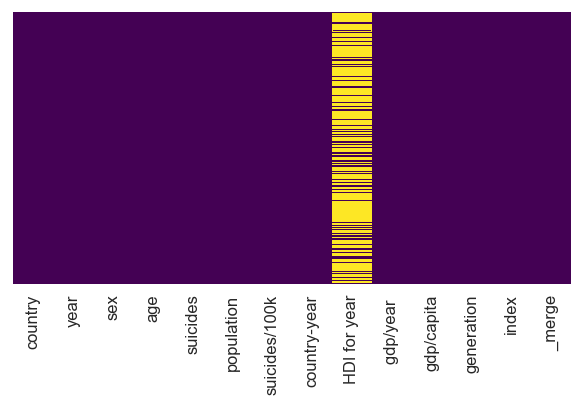

In [46]:
# Finding and Dropping NaN data

plt.figure(figsize=(10,5))
sns.heatmap(df2.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [47]:
number_NAN = len(df2) - df2['HDI for year'].count()
number_noNAN = len(df2)
number_NAN * 100 / number_noNAN

69.751200349192487

It shows that in column "HDI for year", 69.75% of values are NaN. For this analysis, I will be deleting this column

In [48]:
df = df2.drop('HDI for year', axis=1)
df.head()

,country,year,sex,age,suicides,population,suicides/100k,country-year,gdp/year,gdp/capita,generation,index,_merge
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X,0.0,both
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent,0.0,both
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X,0.0,both
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation,0.0,both
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers,0.0,both


Also, the columns that are not needed for this analysis will be deleted

In [49]:
df.drop(['country-year', 'index', '_merge'], axis=1, inplace=True)

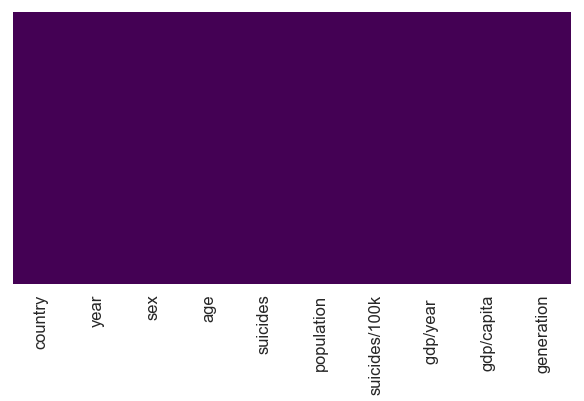

In [50]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

This shows the columns that will be analysied and that there are no more NaN values in the dataset

# Data Analysis

In [51]:
# Data by Country

byCountry = df.groupby('country').mean().sort_values('suicides/100k', ascending=False).reset_index()

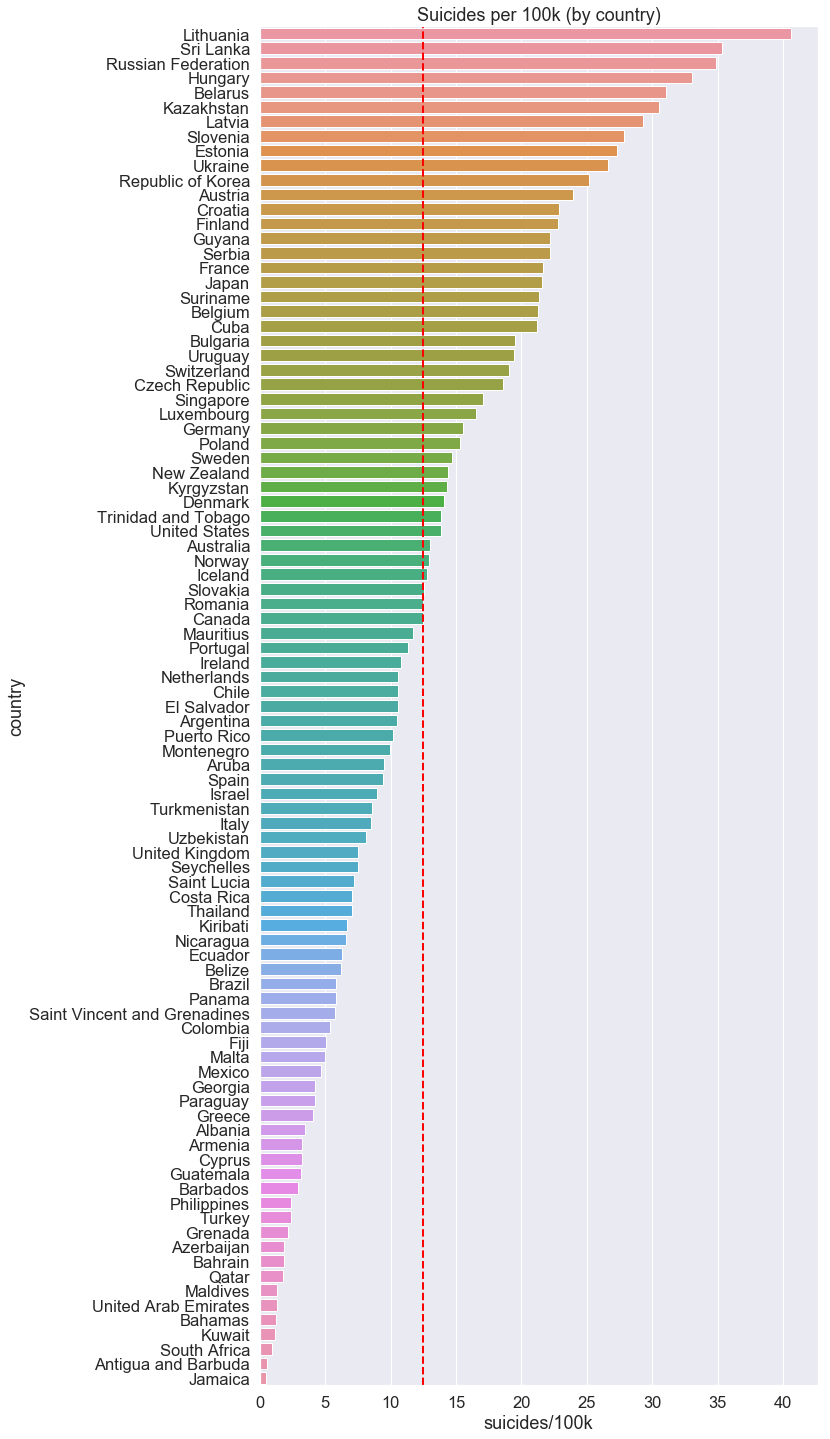

In [52]:
plt.figure(figsize=(10,25))
sns.barplot(x='suicides/100k', y ='country', data=byCountry)
plt.axvline(x = byCountry['suicides/100k'].mean(),color = 'red', ls='--', linewidth=2)
plt.title('Suicides per 100k (by country)')
plt.show()

This shows the total suicide/100k count by country. The red line in the plot represent the average over all countries.

In [53]:
# Suicide by Year

byYear = df.groupby('year').mean().reset_index()

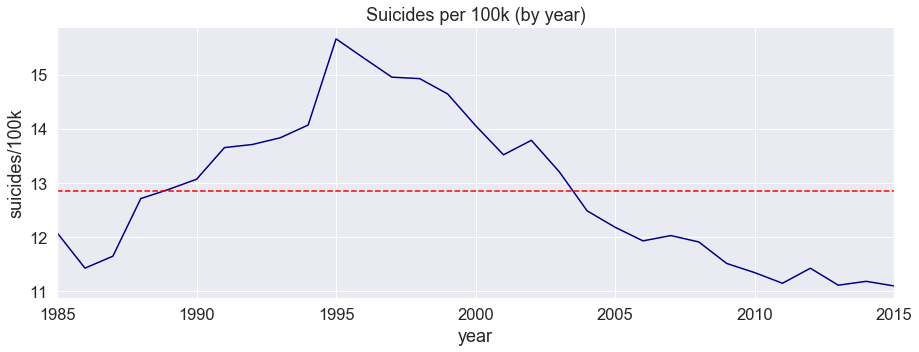

In [54]:
plt.figure(figsize=(15,5))
sns.lineplot(x='year', y='suicides/100k', data=byYear, color='navy')
plt.axhline(byYear['suicides/100k'].mean(), ls='--', color='red')
plt.title('Suicides per 100k (by year)')
plt.xlim(1985,2015)
plt.show()

Conclusion

Lithuania, Sri Lanka, and Russia are the top 3 countries with more suicides per 100k.
On the other hand, Jamaica, Antigua and Barbuda, and South Africa are the top 3 countries with less suicides per 100k.
The number of suicides per 100k has a decresing trend after the peak in 1995.
From 2004 the number of suicides per 100k is below average.

In [55]:
# Suicide by Sex

bySex     = df.groupby('sex').mean().reset_index()
bySexYear = df.groupby(['sex','year']).mean().reset_index()
bySexAge = df.groupby(['sex','age']).mean().sort_values('suicides/100k', ascending=True).reset_index()
bySexGeneration = df.groupby(['sex','generation']).mean().sort_values('suicides/100k', ascending=True).reset_index()

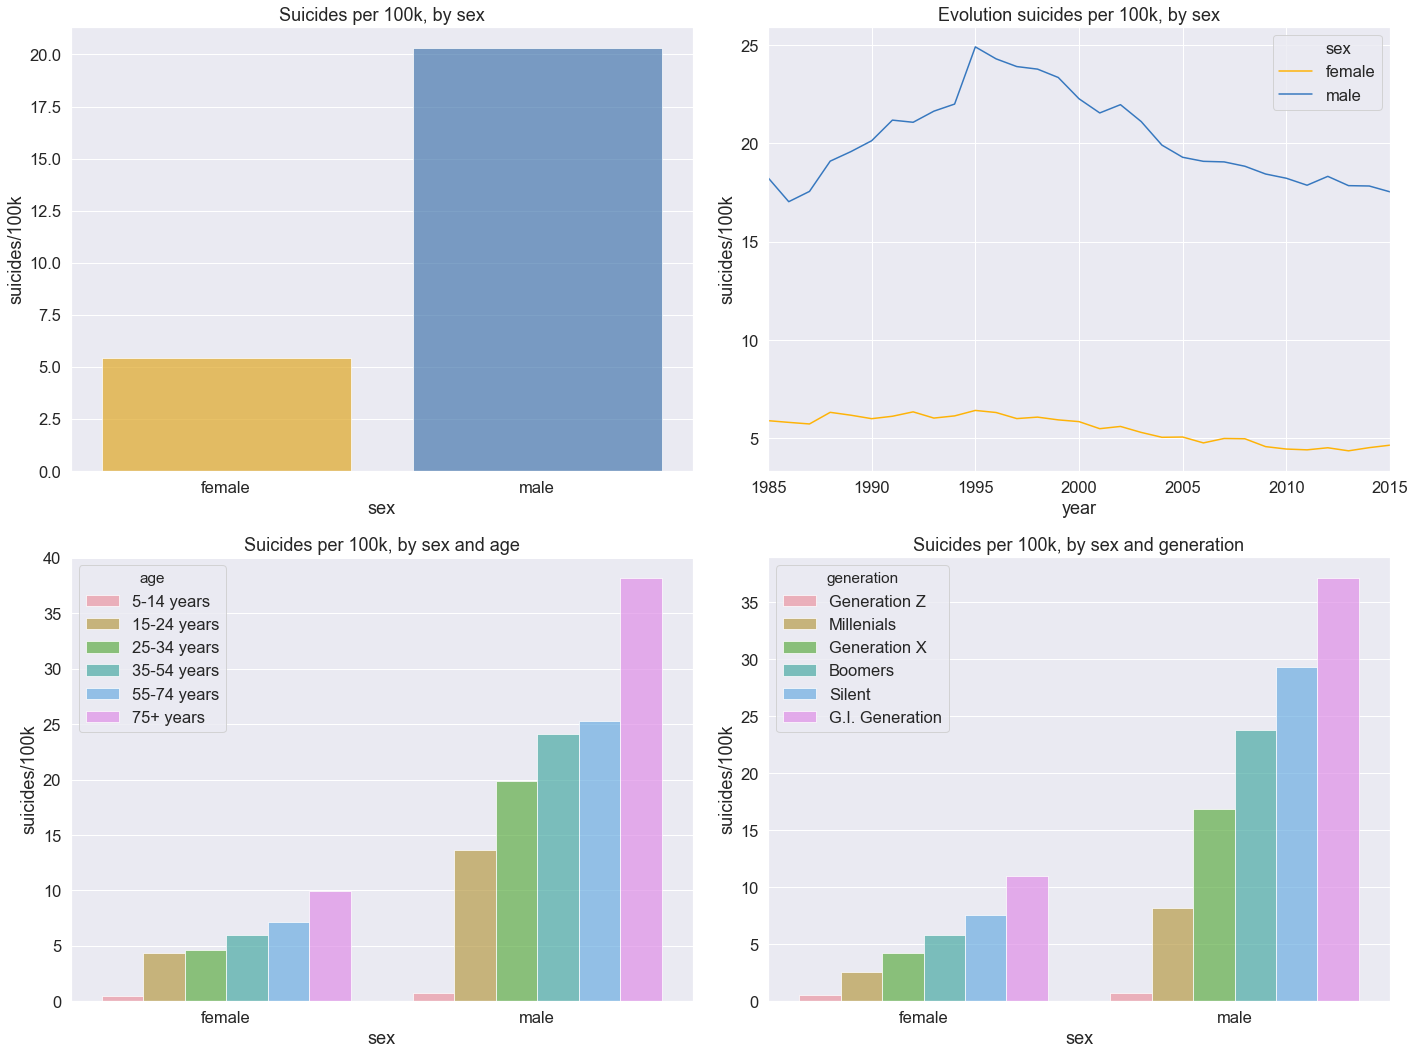

In [56]:
plt.figure(figsize=(20,15))
# By sex
plt.subplot(221)
sns.barplot(x='sex', y='suicides/100k', data=bySex, alpha=alpha)
plt.title('Suicides per 100k, by sex')
# Time veolution by sex
plt.subplot(222)
sns.lineplot(x='year', y='suicides/100k', data=bySexYear, hue='sex')
plt.xlim(1985,2015)
plt.title('Evolution suicides per 100k, by sex')
# By sex and age
plt.subplot(223)
sns.barplot(x='sex', y='suicides/100k', data=bySexAge, hue='age', alpha=alpha)
plt.title('Suicides per 100k, by sex and age')
# By sex and generation
plt.subplot(224)
sns.barplot(x='sex', y='suicides/100k', data=bySexGeneration, hue='generation', alpha=alpha)
plt.title('Suicides per 100k, by sex and generation')

plt.tight_layout()
plt.show()

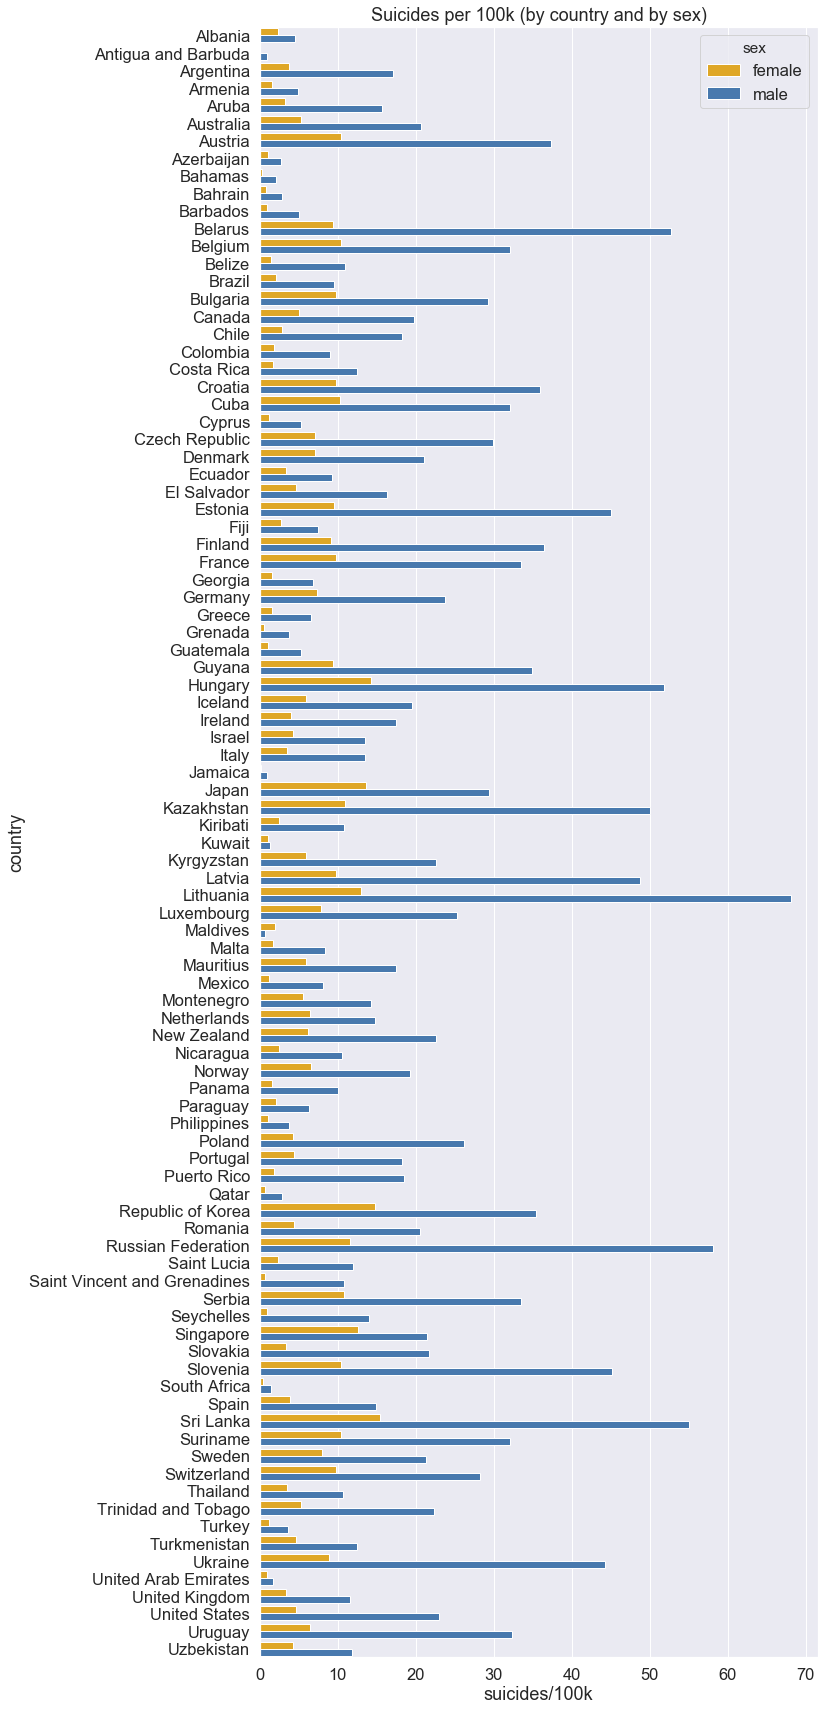

In [57]:
# Plotting suicide count of each country by gender

byCountrySex = df.groupby(['country','sex']).mean().reset_index()
byCountrySex.head()
plt.figure(figsize=(10,30))
sns.barplot(y='country', x='suicides/100k', data=byCountrySex, hue='sex')
plt.title('Suicides per 100k (by country and by sex)')
plt.show()


In [58]:
# Checking for country that have different trend

for country in byCountrySex['country']:
    suicides_female = byCountrySex[(byCountrySex['sex']=='female') & \
                                   (byCountrySex['country']==country)]['suicides/100k']
    suicides_male   = byCountrySex[(byCountrySex['sex']=='male')   \
                                   & (byCountrySex['country']==country)]['suicides/100k']
    if suicides_female.iloc[0] > suicides_male.iloc[0]:
        print(country)

Maldives
Maldives


Conslusions

The graph showed a trend for men to commit more suicide than women.
The number of male suicides per 100k over the years is higher than the female suicides.
Nevertheless, the suicides per 100k from 1995 have decreased for both men and women.
G.I. and Silent generations have more suicides per 100k than the others. One would be able to think that this figure is confusing because some generations are older than others; therefore the number of suicides for the older generations must be higher than the younger ones. Nevertheless, we have observed that the amount of data for G.I. Generation is lower than, for example, Millenials.

In [59]:
# Suicide by Age

byAge     = df.groupby('age').mean().sort_values('suicides/100k', ascending=True).reset_index()
byAgeYear = df.groupby(['age','year']).mean().sort_values('suicides/100k', ascending=True).reset_index()
byAgeSex = df.groupby(['age','sex']).mean().sort_values('suicides/100k', ascending=True).reset_index()
byAgeGen = df.groupby(['age','generation']).mean().sort_values('suicides/100k', ascending=True).reset_index()

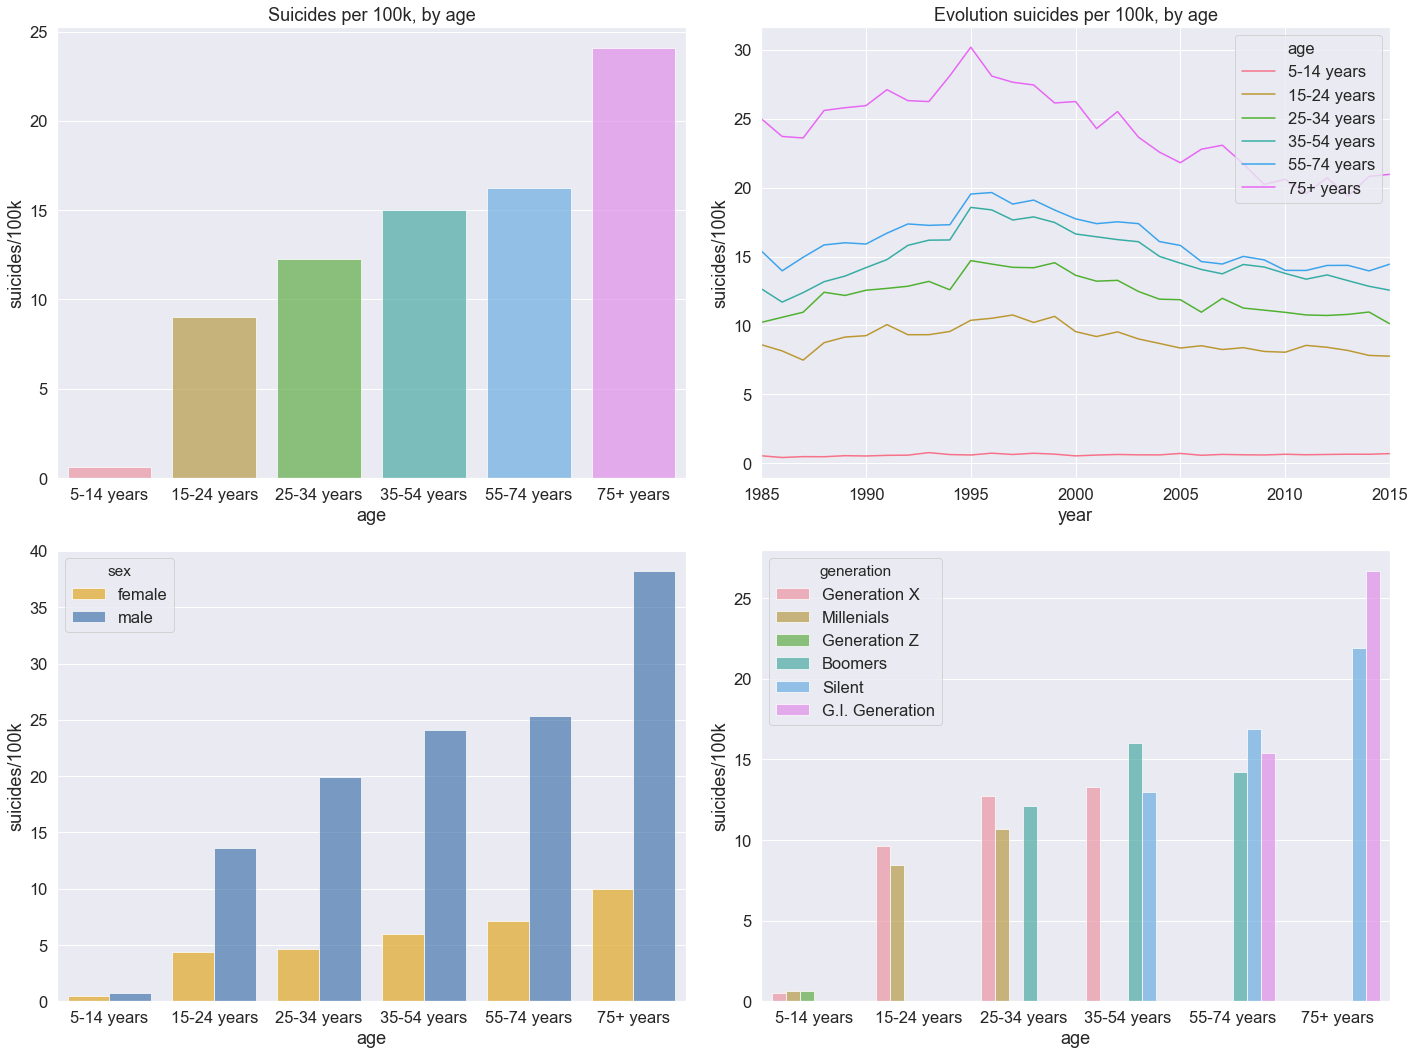

In [60]:
plt.figure(figsize=(20,15))
# By age
plt.subplot(221)
sns.barplot(x='age', y='suicides/100k', data=byAge, alpha=alpha)
plt.title('Suicides per 100k, by age')
# Time evolution by age
plt.subplot(222)
sns.lineplot(x='year', y='suicides/100k', data=byAgeYear, hue='age')
plt.xlim(1985,2015)
plt.title('Evolution suicides per 100k, by age')
# 
plt.subplot(223)
sns.barplot(x='age', y='suicides/100k', data=byAgeSex, hue='sex', alpha=alpha)
plt.subplot(224)
sns.barplot(x='age', y='suicides/100k', data=byAgeGen, hue='generation', alpha=alpha)

plt.tight_layout()
plt.show()

Conclusion

The number of suicides per 100k increases with the age.
The number of suicides per 100k decreases from 1995 to 2015 in all age groups except 5-14 year, which slightly increases.
The peak of suicides in 1995 is more striking for people with ages +75.
In all age groups there are more male suicides per 100k than female ones.

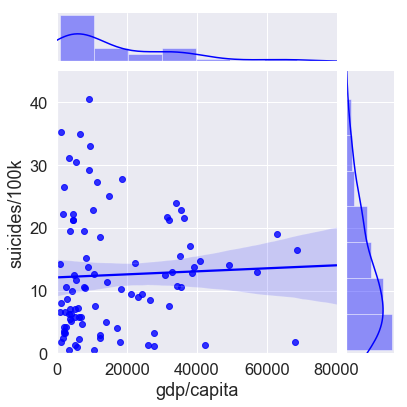

In [61]:
# Suicide and GDP

g = sns.jointplot(x="gdp/capita", y="suicides/100k", data=byCountry, kind='regresion', \
              xlim=(-100,80000), ylim=(0,45), color='blue')

Since there were gdp/capita data available, I wanted to see if there were any correlation between the suicide count and GDP.
The above plot represent the relationship between suicide and GDP. It seems that there are no correlation between those two variables.

# Summary

The number of suicide has been decreasing over the years. Lithuania, Sri Lanka, and Russia had the highest suicide per 100k. Jamaica, Antigua and Barbuda, and South Africa. Year 1995 had the highest suicide count and it has been decreasing since then. Male seems to commit more suicide than women. Also, as age increase, the suicide per 100k also increased. One thing to consider is that there were more data available for lower age group than higher age group. This could skew the analysis. 

Suicide has been decreasing since 1995. Following this trend, you can predict that it will furthur decrease as years go by. For future research, It will be interesting to study why there was a high suicide count around 1995 and also why males commit more suicide than women.